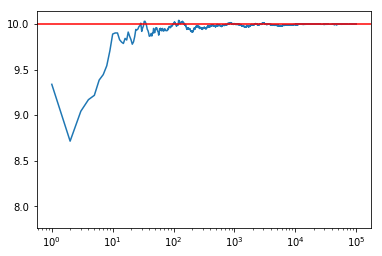

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.semilogx(pd.Series(np.random.normal(loc=10, size=100000)).expanding(1).mean())
plt.axhline(10, color="r")

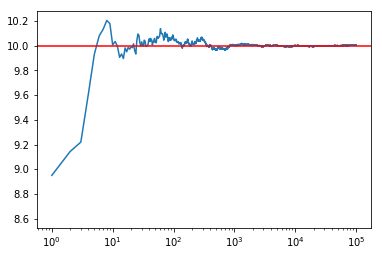

In [2]:
plt.semilogx(np.cumsum(np.random.normal(loc=10, size=100000))/ np.arange(1, 100001))
plt.axhline(10, color="r")

In [3]:
import scipy.stats as stats

uniform_data = stats.uniform.rvs(size=100000, loc=0, scale=10)

In [4]:
dir[stats.uniform]

TypeError: 'builtin_function_or_method' object is not subscriptable

In [5]:
uniform_data

array([ 1.41968521,  3.03854672,  4.55194148, ...,  1.81092938,
        6.94255644,  7.52976992])

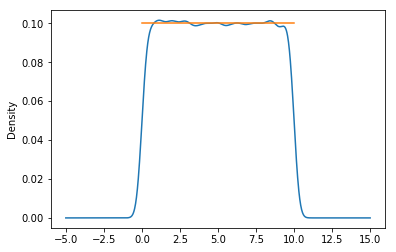

In [6]:
pd.Series(uniform_data).plot(kind="density")

values = np.linspace(0, 10, 1000)

plt.plot(values, stats.uniform.pdf(values, loc=0, scale=10))

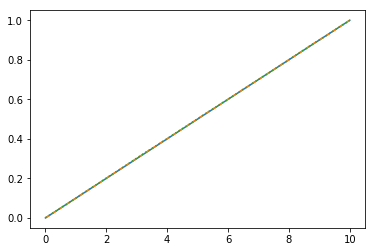

In [7]:
plt.plot(values, stats.uniform.cdf(values, loc=0, scale=10))
distribution = np.histogram(uniform_data, bins=1000, density=True)[0]

#CDF: F(x) = P(x<=x) = Integral f(x')dx' from -infinity to x
#          ~= Sum i=1->inf [f(x'_i)delta(x'_i)]  x_n==x

# Sumf(x') i=1->inf [f(x'_i)delta(x'_i)=1]
# let's assume delta(x_i) = c for any i
# c*Sum i=1->inf [f(x'_i)] =1
# c= 1/Sum i=1->inf [f(x'_i)]

delta_x = values[1:] - values[:-1]
delta_x = np.insert(delta_x, 0, 0)
plt.plot(values, np.cumsum(distribution * delta_x), "--")

plt.plot(values, np.cumsum(distribution) / sum(distribution), ":")

Markov Chains

In [8]:
customer_df = pd.read_csv("./customer_state_data.csv")
customer_df.drop("Unnamed: 0", 1, inplace=True)

In [9]:
# Customers' payment status with state being the number of months they are late
# They go up or down, one state at a time
# If they reach state 7, they cannot go back down and are sent to collections

customer_df

,CustomerID,Date,State
0,UID0,2013-01-31,0
1,UID0,2013-02-28,0
2,UID0,2013-03-31,0
3,UID0,2013-04-30,0
4,UID0,2013-05-31,0
5,UID0,2013-06-30,0
6,UID0,2013-07-31,0
7,UID0,2013-08-31,0
8,UID0,2013-09-30,0
9,UID0,2013-10-31,0


In [10]:
customer_df["CustomerID"].value_counts()

UID562    48
UID419    48
UID194    48
UID28     48
UID269    48
UID808    48
UID872    48
UID391    48
UID291    48
UID426    48
UID312    48
UID664    48
UID504    48
UID246    48
UID289    48
UID771    48
UID0      48
UID443    48
UID148    48
UID422    48
UID25     48
UID916    48
UID304    48
UID641    48
UID524    48
UID592    48
UID542    48
UID61     48
UID387    48
UID633    48
          ..
UID453    48
UID885    48
UID238    48
UID921    48
UID395    48
UID728    48
UID789    48
UID452    48
UID166    48
UID605    48
UID898    48
UID189    48
UID856    48
UID450    48
UID679    48
UID747    48
UID680    48
UID624    48
UID989    48
UID444    48
UID15     48
UID951    48
UID264    48
UID851    48
UID125    48
UID114    48
UID522    48
UID866    48
UID825    48
UID847    48
Name: CustomerID, Length: 1000, dtype: int64

In [11]:
customer_df["CustomerID"].nunique()

1000

In [12]:
customer_df["Date"].nunique()

48

In [13]:
customer_df["State"].value_counts().sort_index()

0    26357
1     3334
2     2751
3     2172
4     1724
5     1399
6      858
7     9405
Name: State, dtype: int64

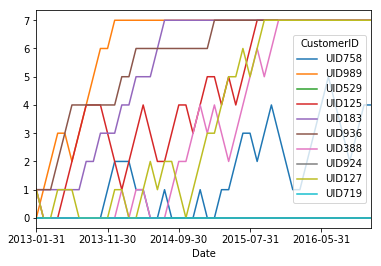

In [14]:
customer_df.pivot(index="Date", columns="CustomerID", values="State").sample(10, axis=1).plot()

In [15]:
customer_df["Next_State"] = customer_df.groupby("CustomerID")["State"].shift(-1)
customer_df

,CustomerID,Date,State,Next_State
0,UID0,2013-01-31,0,0.0
1,UID0,2013-02-28,0,0.0
2,UID0,2013-03-31,0,0.0
3,UID0,2013-04-30,0,0.0
4,UID0,2013-05-31,0,0.0
5,UID0,2013-06-30,0,0.0
6,UID0,2013-07-31,0,0.0
7,UID0,2013-08-31,0,0.0
8,UID0,2013-09-30,0,0.0
9,UID0,2013-10-31,0,0.0


In [16]:
P_avg = pd.crosstab(customer_df["State"], customer_df["Next_State"], normalize=0)
P_avg

Next_State,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0
State,,,,,,,,
0,0.955492,0.044508,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
1,0.300241,0.341581,0.358177,0.000000,0.000000,0.000000,0.000000,0.00000
2,0.000000,0.267010,0.359691,0.373299,0.000000,0.000000,0.000000,0.00000
3,0.000000,0.000000,0.272812,0.338920,0.388268,0.000000,0.000000,0.00000
4,0.000000,0.000000,0.000000,0.251465,0.335287,0.413247,0.000000,0.00000
5,0.000000,0.000000,0.000000,0.000000,0.229769,0.372110,0.398121,0.00000
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.211334,0.362456,0.42621
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000


In [17]:
from numpy.linalg import pinv

N = pd.DataFrame(pinv(np.eye(P_avg.shape[0] - 1) - P_avg.iloc[:-1, :-1])).sum(1)
N[7] = 0
N

0    105.556450
1     83.088624
2     61.463109
3     43.316188
4     27.989935
5     16.243888
6      6.953067
7      0.000000
dtype: float64

In [19]:
P_c1 = pd.crosstab(customer_df.loc[customer_df["CustomerID"] == "UID0", "State"],
                   customer_df.loc[customer_df["CustomerID"] == "UID0", "Next_State"],
                   normalize=0)
P_c1

Next_State,0.0
State,
0,1.0


In [20]:
def get_adjusted_P(df, P_original):
    
    cross_cust = pd.DataFrame(pd.crosstab(df["State"], df["Next_State"]),
                                          index=range(8), columns=range(8)).fillna(0)
                                          
    number = pd.DataFrame(np.ones([8,8])).apply(lambda r: r * cross_cust.sum(1), axis=0)
    P_spe = ((cross_cust + 1) / (number + 1/P_original)).apply(lambda r: r / r.sum(), 1)
    N = pd.DataFrame(pinv(np.eye(P_spe.shape[0] - 1) - P_spe.iloc[:-1, :-1])).sum(1)
    N[7] = 0
    return P_spe, N

In [21]:
df = customer_df.loc[customer_df["CustomerID"] == "UID0"]

P_spe, N = get_adjusted_P(df, P_avg)

#Execute either
#P_spe
#N
N

0    265.496819
1    195.096342
2    133.291393
3     86.405291
4     50.885801
5     26.851954
6     10.469444
7      0.000000
dtype: float64